In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from warnings import filterwarnings    
filterwarnings(action='ignore')   

In [2]:
twitter = pd.read_csv('twitter_training.csv')

In [3]:
twitter

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
twitter.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
twitter = twitter.rename(columns={'2401': 'ID'})

In [6]:
twitter = twitter.rename(columns={'Borderlands': 'Game'})

In [7]:
twitter = twitter.rename(columns={'Positive': 'Sentiments'})

In [8]:
twitter = twitter.rename(columns={'im getting on borderlands and i will murder you all ,': 'Message'})

In [9]:
twitter.shape

(74681, 4)

In [10]:
twitter.columns

Index(['ID', 'Game', 'Sentiments', 'Message'], dtype='object')

In [11]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          74681 non-null  int64 
 1   Game        74681 non-null  object
 2   Sentiments  74681 non-null  object
 3   Message     73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
twitter.isnull().sum()

ID              0
Game            0
Sentiments      0
Message       686
dtype: int64

In [13]:

twitter.ID.unique()

array([2401, 2402, 2403, ..., 9198, 9199, 9200])

In [14]:
twitter.Game.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [15]:
twitter.Sentiments.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [16]:
twitter.Message.unique()

array(['I am coming to the borders and I will kill you all,',
       'im getting on borderlands and i will kill you all,',
       'im coming on borderlands and i will murder you all,', ...,
       'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice',
       'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice',
       'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice'],
      dtype=object)

In [17]:
 #Count of unique entities
Game_count= twitter['Game'].value_counts()
print(Game_count)

Game
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
CS-GO                                2304
Cyberpunk2077                        2304
GrandTheftAuto(GTA)          

In [18]:
duplicates = twitter.duplicated()
duplicated_rows = twitter[duplicates]
duplicated_rows.count()

ID            2700
Game          2700
Sentiments    2700
Message       2340
dtype: int64

In [19]:
twitter.drop_duplicates(inplace=True)

In [20]:
twitter.isnull().sum()

ID              0
Game            0
Sentiments      0
Message       326
dtype: int64

In [21]:
twitter = twitter.dropna()

In [22]:
twitter.isnull().sum()

ID            0
Game          0
Sentiments    0
Message       0
dtype: int64

In [23]:
twitter.nunique()

ID            12447
Game             32
Sentiments        4
Message       69490
dtype: int64

In [24]:
for i in range(5):
    print(f"{i+1} : {twitter['Message'][i]} -> {twitter['Sentiments'][i]}")

1 : I am coming to the borders and I will kill you all, -> Positive
2 : im getting on borderlands and i will kill you all, -> Positive
3 : im coming on borderlands and i will murder you all, -> Positive
4 : im getting on borderlands 2 and i will murder you me all, -> Positive
5 : im getting into borderlands and i can murder you all, -> Positive


In [25]:
twitter['Sentiments'].value_counts()

Sentiments
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

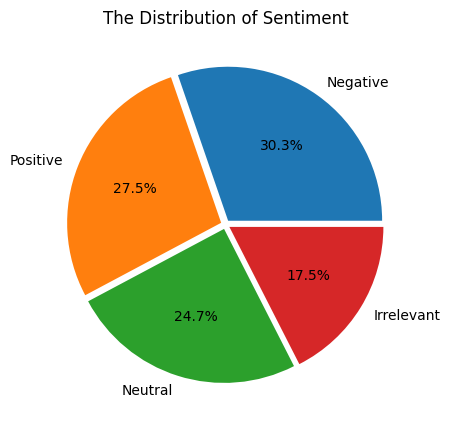

In [26]:
plt.figure(figsize=(10,5))
plt.pie(x=twitter['Sentiments'].value_counts().values, 
        labels=twitter['Sentiments'].value_counts().index, 
        autopct='%.1f%%', explode=[0.03, 0.03,0.03,0.03])
plt.title('The Distribution of Sentiment')
plt.show()

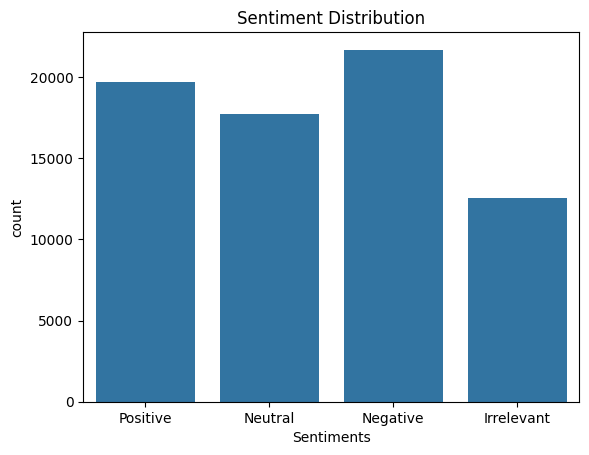

In [27]:
sns.countplot(x='Sentiments', data=twitter)
plt.title('Sentiment Distribution')
plt.show()

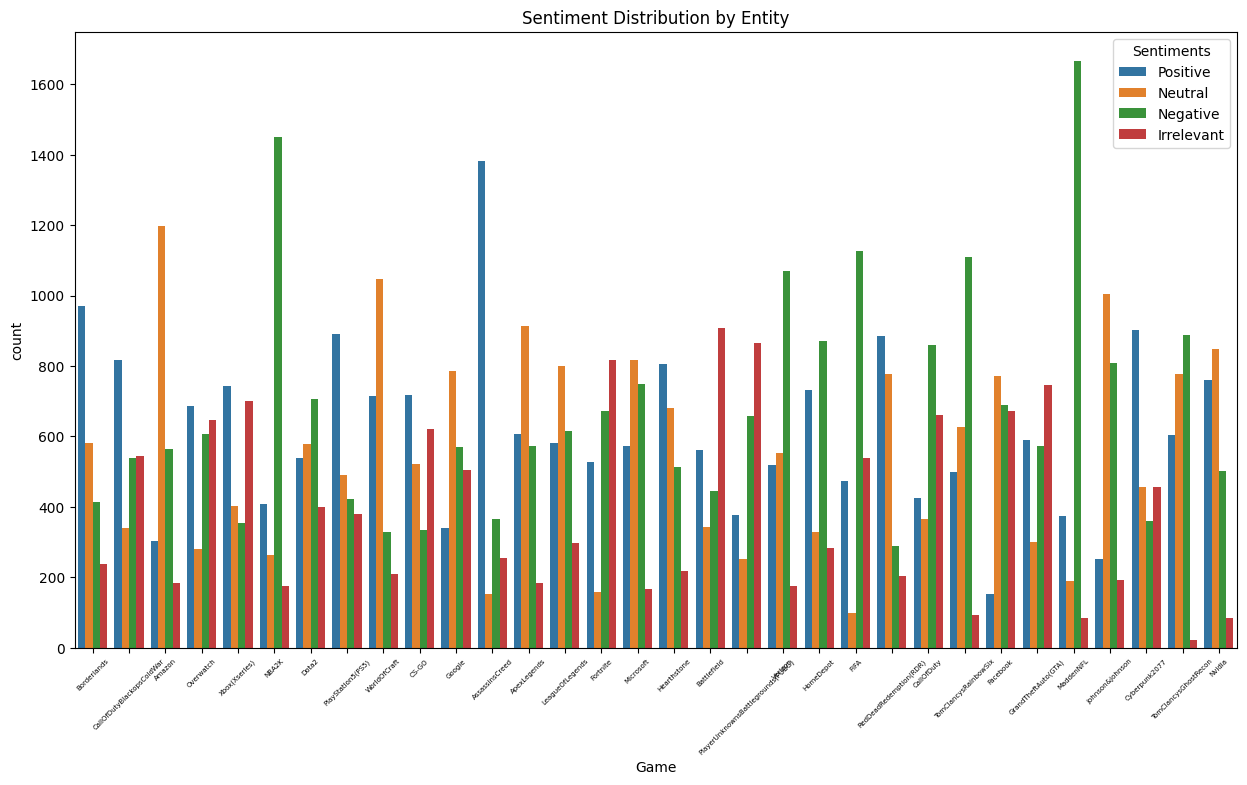

In [28]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Game', hue='Sentiments', data=twitter)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=45, fontsize=5)
plt.show()

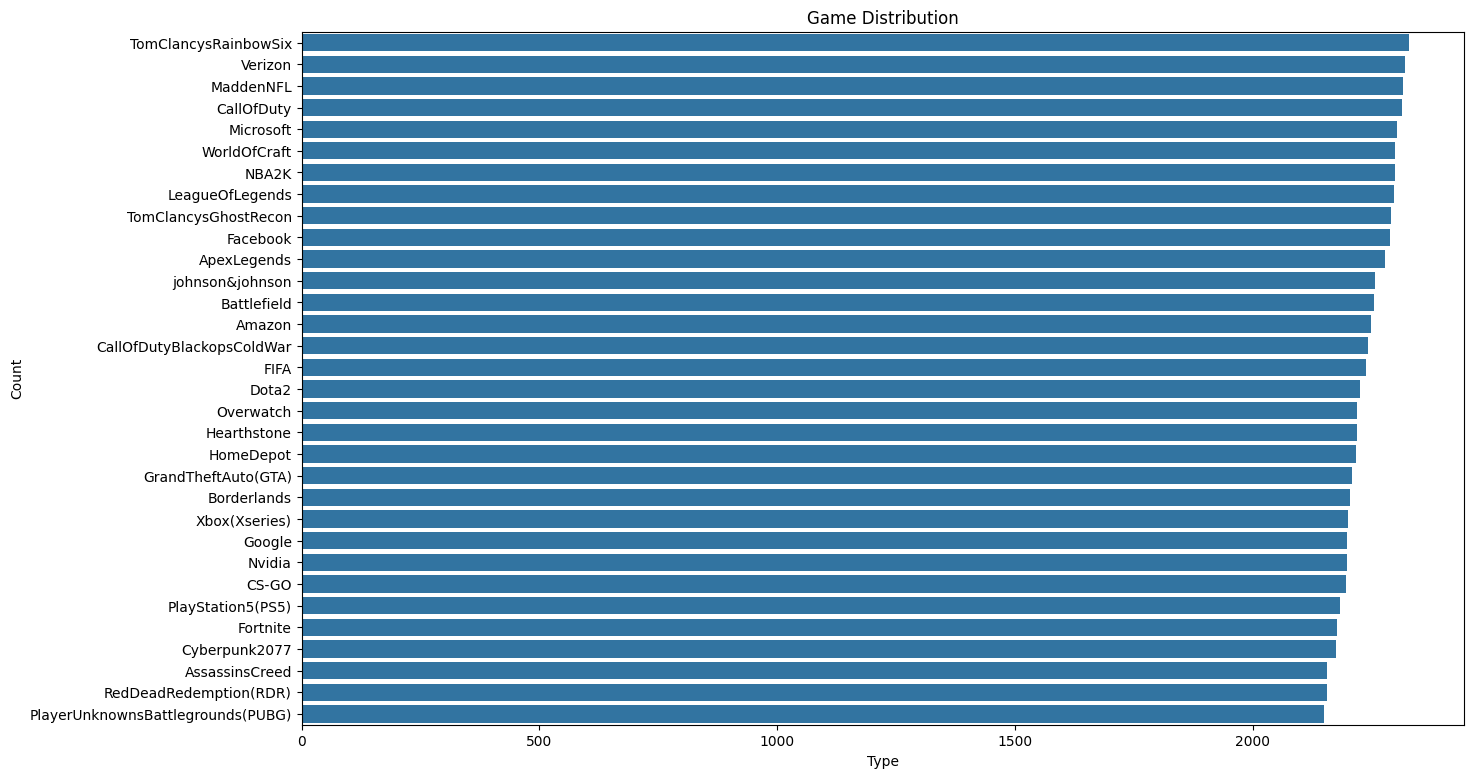

In [29]:
plt.figure(figsize=(15,9))
sns.barplot(x=twitter['Game'].value_counts().values,y=twitter['Game'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Game Distribution')
plt.show()

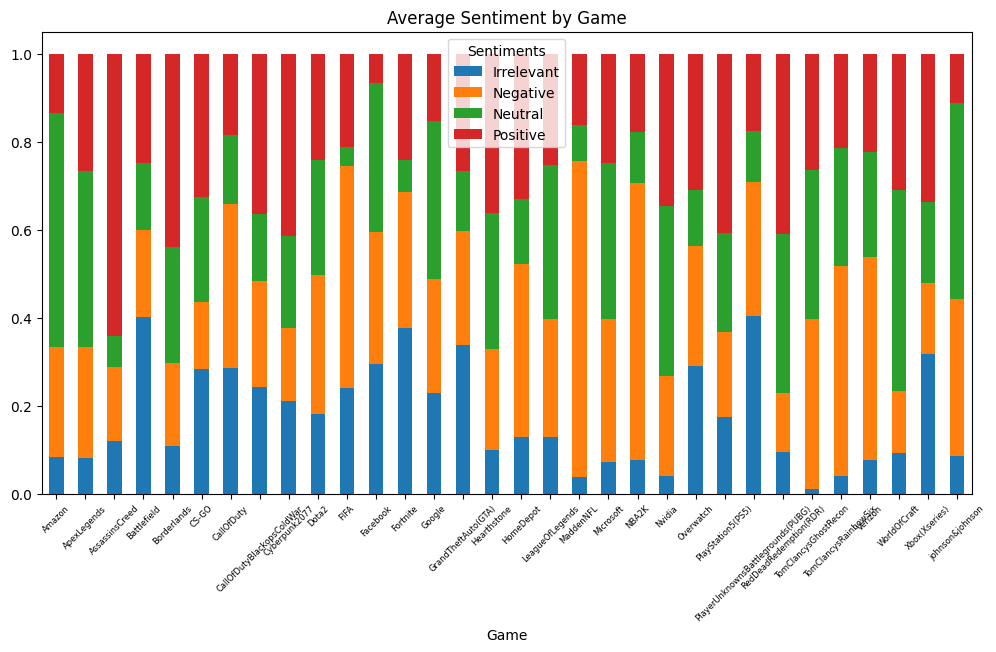

In [30]:
average_sentiment_by_Game = twitter.groupby('Game')['Sentiments'].value_counts(normalize=True).unstack()
average_sentiment_by_Game.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sentiment by Game')
plt.xticks(rotation=45, fontsize=6)
plt.show()      

In [31]:
import nltk  #imports the Natural Language Toolkit (nltk),
import re     #provides support for regular expressions
stemmer = nltk.SnowballStemmer("english")   #creates a Snowball stemmer for the English language
nltk.download('stopwords')     #downloads the set of stopwords from the NLTK 
from nltk.corpus import stopwords   #imports the stopwords module from the NLTK corpus
import string   #contains useful constants and classes for string manipulation
stopword=set(stopwords.words('english'))  #retrieves the list of English stopwords from the NLTK corpus 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vatsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [33]:
twitter["Message"] = twitter["Message"].apply(clean)

In [34]:
twitter.head()

,ID,Game,Sentiments,Message
0,2401,Borderlands,Positive,come border kill
1,2401,Borderlands,Positive,im get borderland kill
2,2401,Borderlands,Positive,im come borderland murder
3,2401,Borderlands,Positive,im get borderland murder
4,2401,Borderlands,Positive,im get borderland murder


In [35]:
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(width=800,height=500,min_font_size=10,background_color='white')

In [36]:
from PIL import Image, ImageDraw, ImageFont

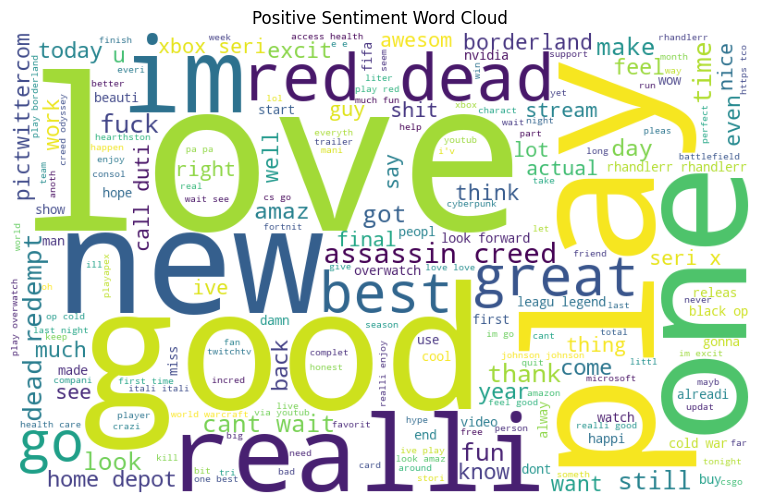

In [37]:
positive_data = twitter[twitter['Sentiments'] == 'Positive']['Message'].str.cat(sep=" ")

# Exclude the word "game" from the text data
positive_data = positive_data.replace("game", "")
if positive_data:
    wc = WordCloud(width=800, height=500, background_color='white').generate(positive_data)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")

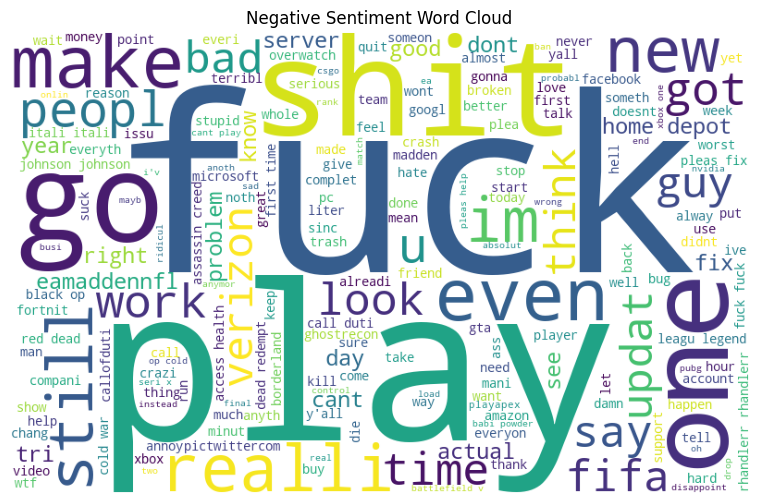

In [38]:
negative_data = twitter[twitter['Sentiments'] == 'Negative']['Message'].str.cat(sep=" ")

# Exclude the word "game" from the text data
negative_data = negative_data.replace("game", "")
if negative_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(negative_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")

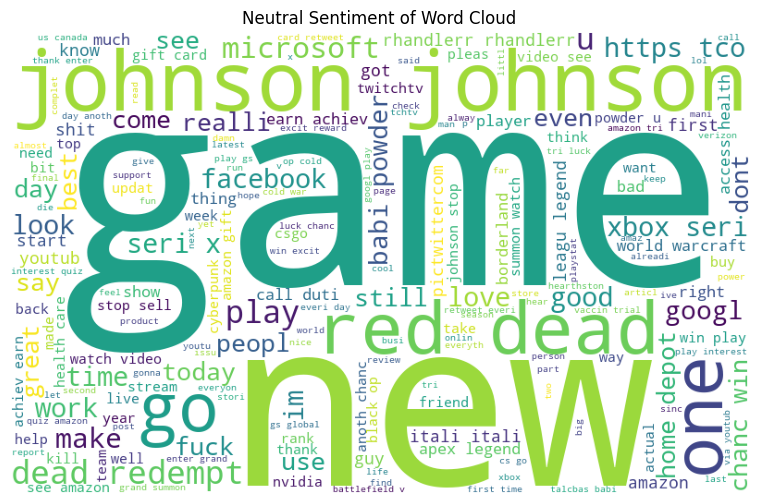

In [39]:
neutral_data = twitter[twitter['Sentiments']=='Neutral']['Message'].str.cat(sep= " ")
neutral_data = neutral_data.replace("Game" , " ")

if neutral_data.strip():
    wc= WordCloud(width=800, height=500, background_color='white').generate(neutral_data)
    plt.figure(figsize = (12,6))
    plt.title("Neutral Sentiment of Word Cloud")
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data Available for neutral Sentiment")
    

In [40]:
irrelevant_data = twitter[twitter['Sentiments'] == 'irrelevant']['Message'].str.cat(sep= " ")
irrelevant_data = irrelevant_data.replace("Game", " ")

if irrelevant_data.strip():
    wc = WordCloud(width = 800, height = 500 , background_color='white').generate(irrelevant_data)
    plt.figure(figsize =(12,6))
    plt.title('Irrelevant Sentiment of Word cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data avaiable for irrelevant Sentiment.")

No data avaiable for irrelevant Sentiment.
